# Predict automobile price using Machine Learning

Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [8]:
ap= pd.read_csv('C:\\Users\\Mudigonda\\Documents\\BOARD INFINITY\\Machine learning\\ML Project 2_ Automobile\\AutoData (1).csv')
ap.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Perform EDA on the data

In [6]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [9]:
ap.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [ ]:
# #checking duplicates
# sum(df.duplicated(subset = 'car_ID')) == 0
# # No duplicate values

In [11]:
ap.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
ap['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [13]:
ap['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64>

## Univariate Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

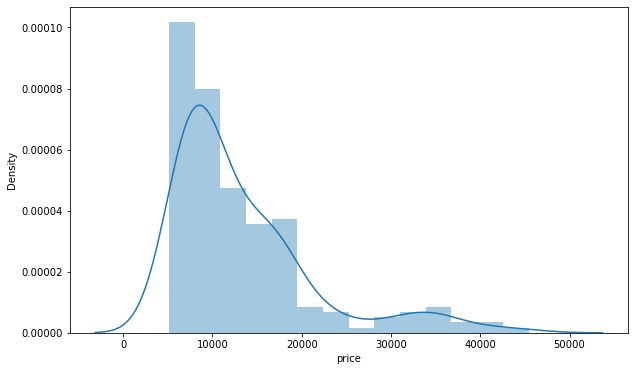

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(ap.price)

as we can see the price column is right skewed

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

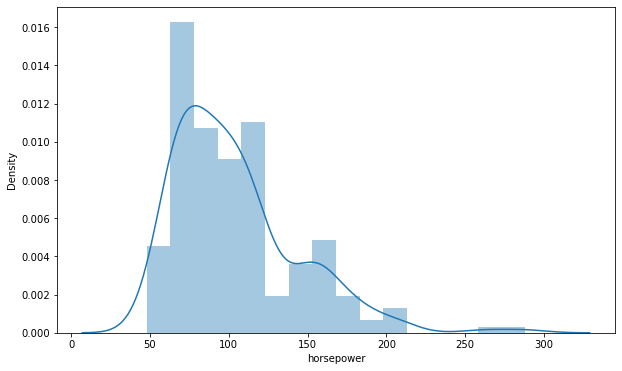

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(ap.horsepower)

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

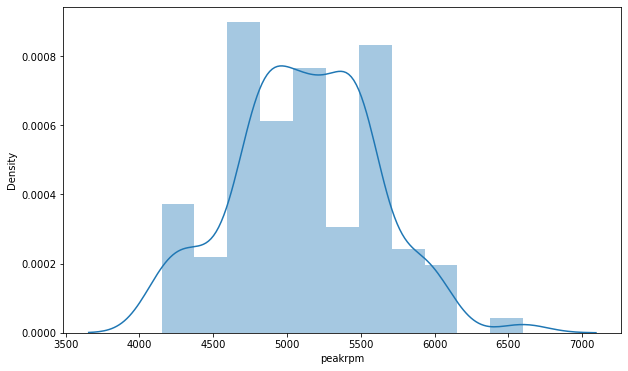

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(ap.peakrpm)

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

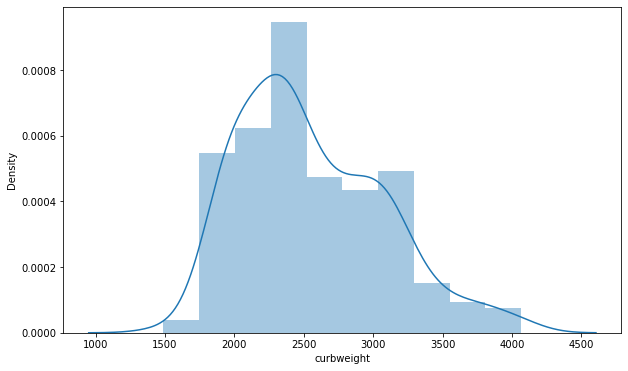

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(ap.curbweight)

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

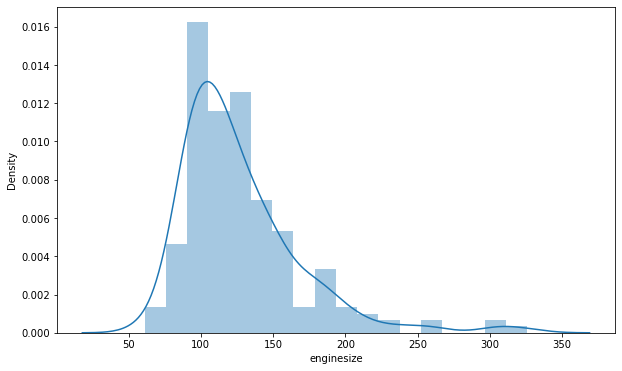

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(ap.enginesize)

In [34]:
# # Separating numerical and categorical collumns
# all_cols = ap.columns
# numerical_cols = ap._get_numeric_data().columns.to_list()
# categorical_cols = list(set(all_cols)- set(numerical_cols))
# print('Numeric columns:\n',categorical_cols)
# print('categorical columns:\n',numerical_cols)

In [35]:
all_cols=ap.columns
num_cols = ap.select_dtypes(include='number').columns.to_list()
cat_cols = list(set(all_cols)- set(num_cols))
print('Numeric columns:\n',cat_cols)
print('categorical columns:\n',num_cols)

Numeric columns:
 ['fueltype', 'doornumber', 'enginetype', 'fuelsystem', 'drivewheel', 'make', 'carbody', 'aspiration', 'enginelocation', 'cylindernumber']
categorical columns:
 ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


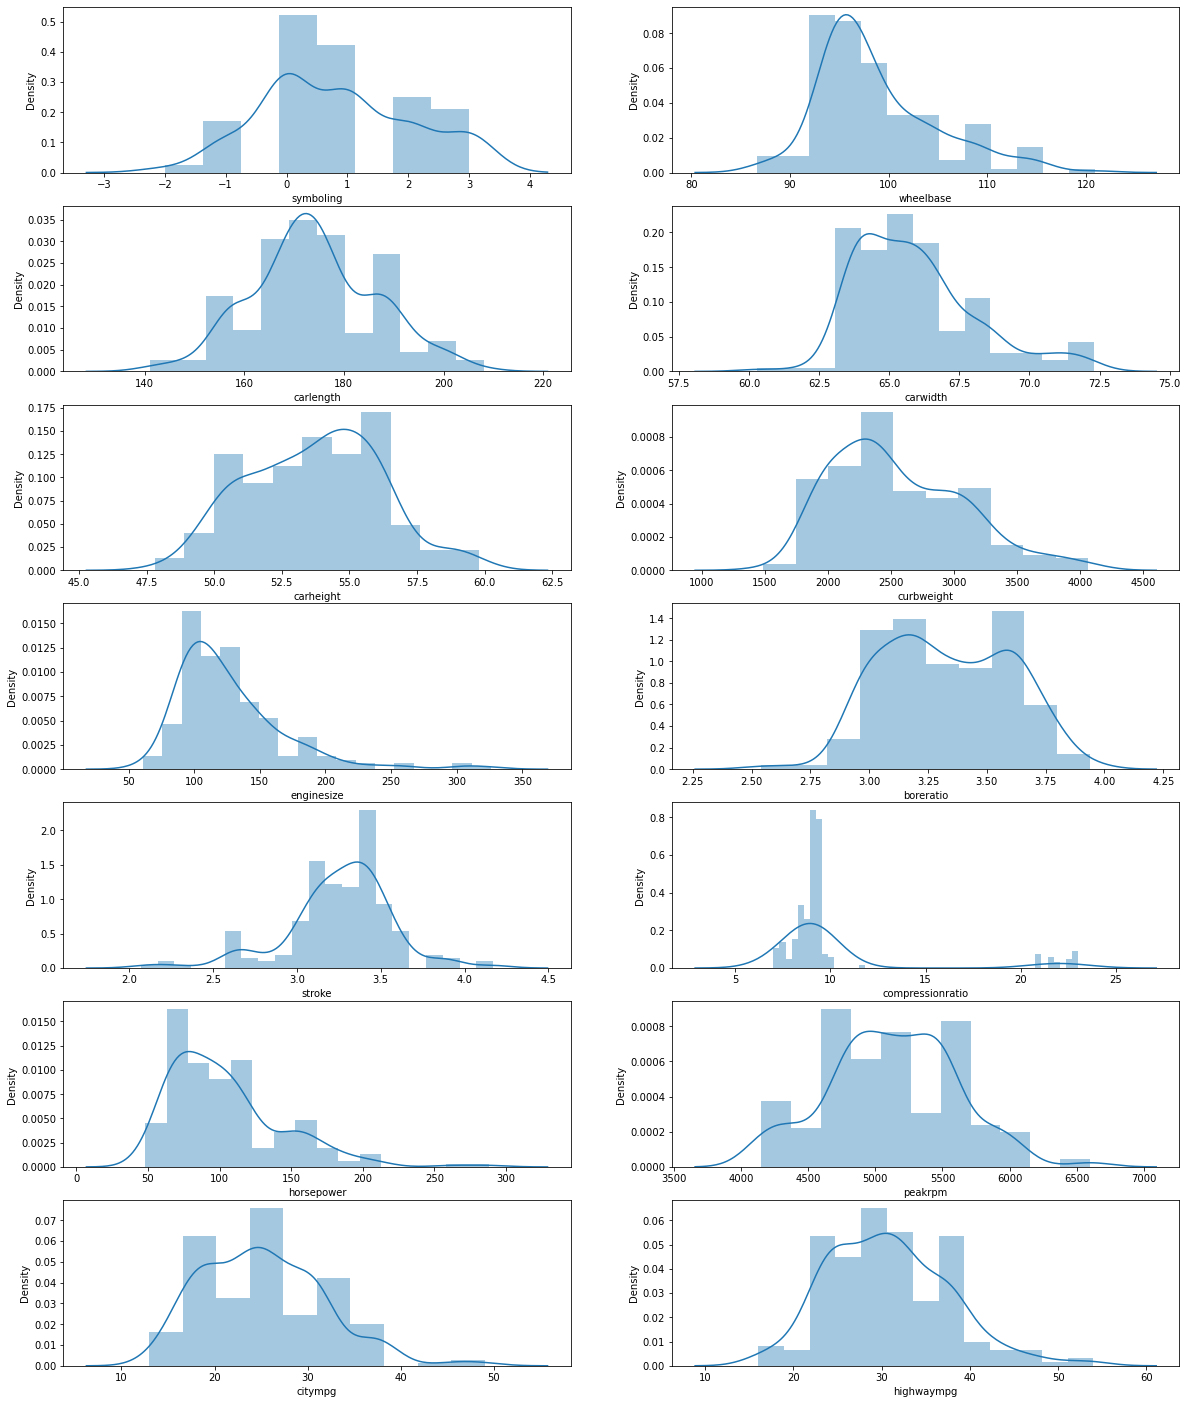

In [36]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, num_cols)):   
    if col != 'price':    
        sns.distplot(ap[col], ax=ax)

We might want to remove symboling collumn because i think it will be best for us. wheelbase and carlength are close to the gaussian distribution. In compress ratrion it can be clearly seen that there are some outliers which disturbs the overall distribution.

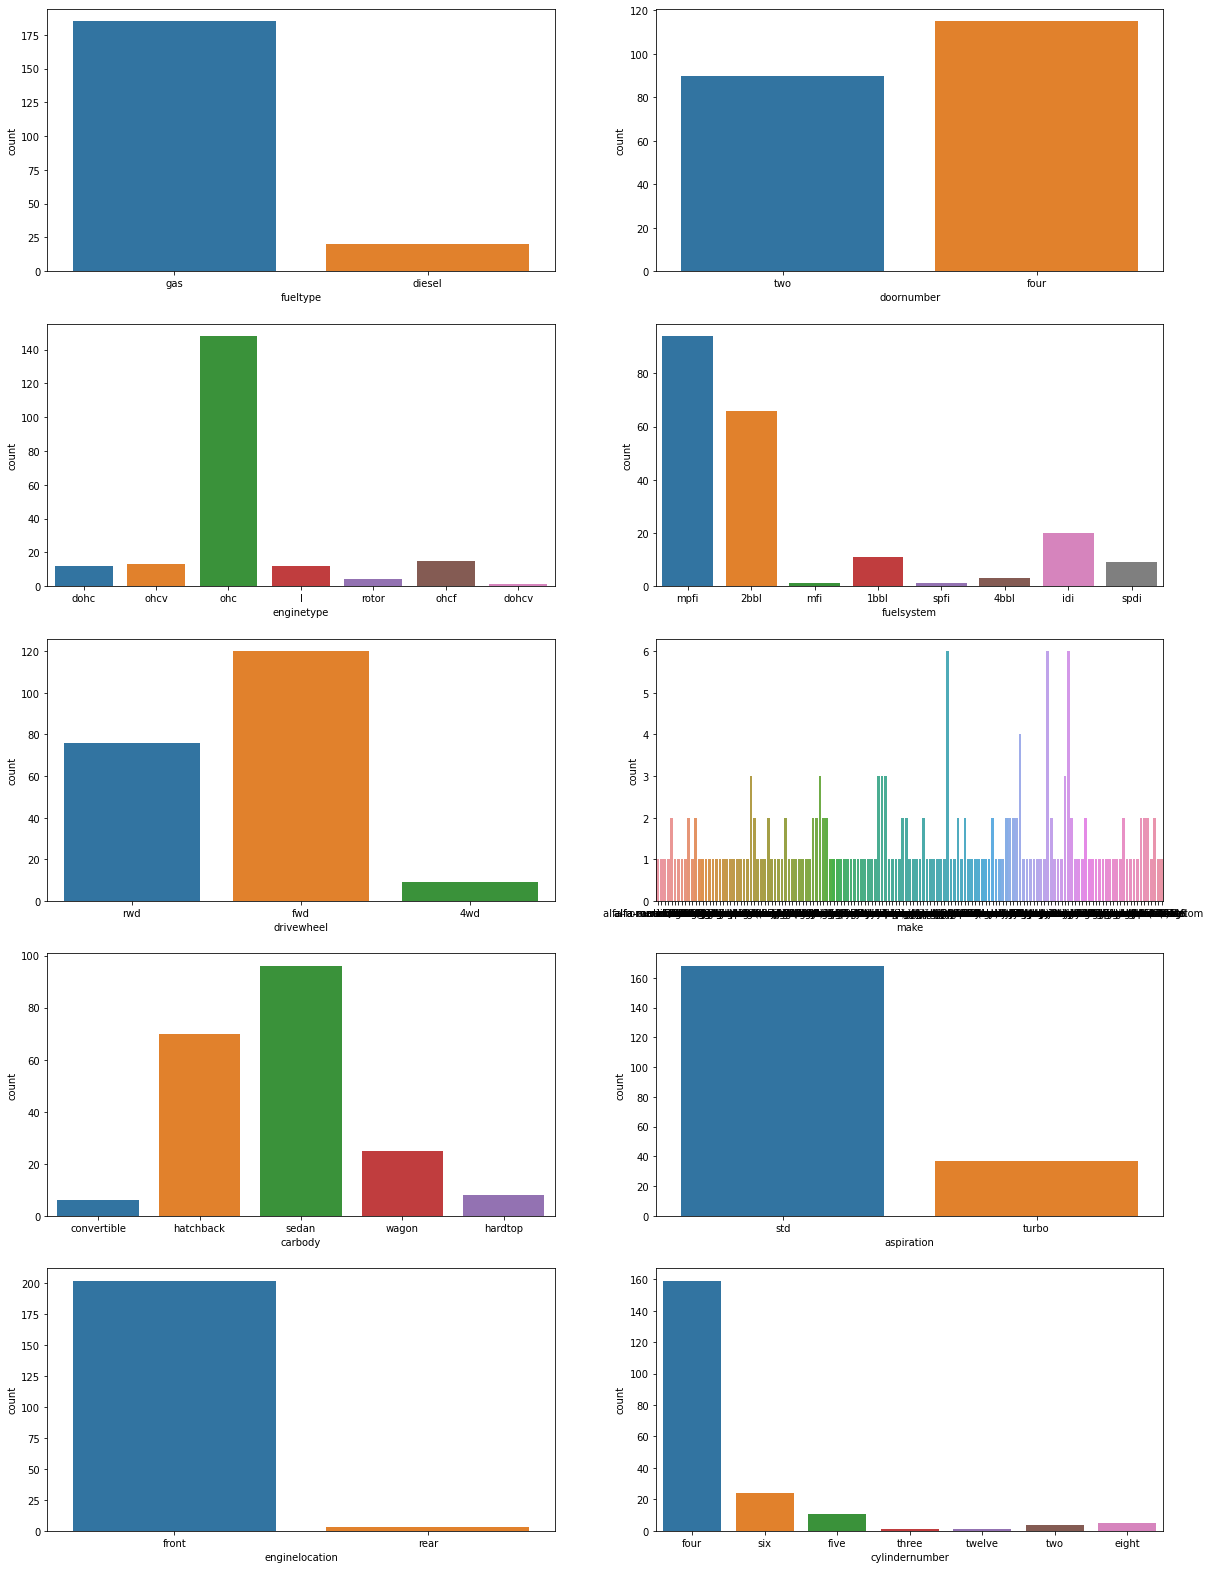

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list(zip(axes.flat, cat_cols)):        
    sns.countplot(ap[col], ax=ax)

- we might want to remove 'make' column becuase it has too many unique values.
- The engine location column has really high values for front and so less values for rear

In [40]:
print(ap.enginelocation.value_counts())
print(ap[ap.enginelocation == 'front'].price.median())
print(ap[ap.enginelocation == 'rear'].price.median())

front    202
rear       3
Name: enginelocation, dtype: int64
10221.5
34028.0


as use can see for 3 values the value is so high, so we can simply delete it

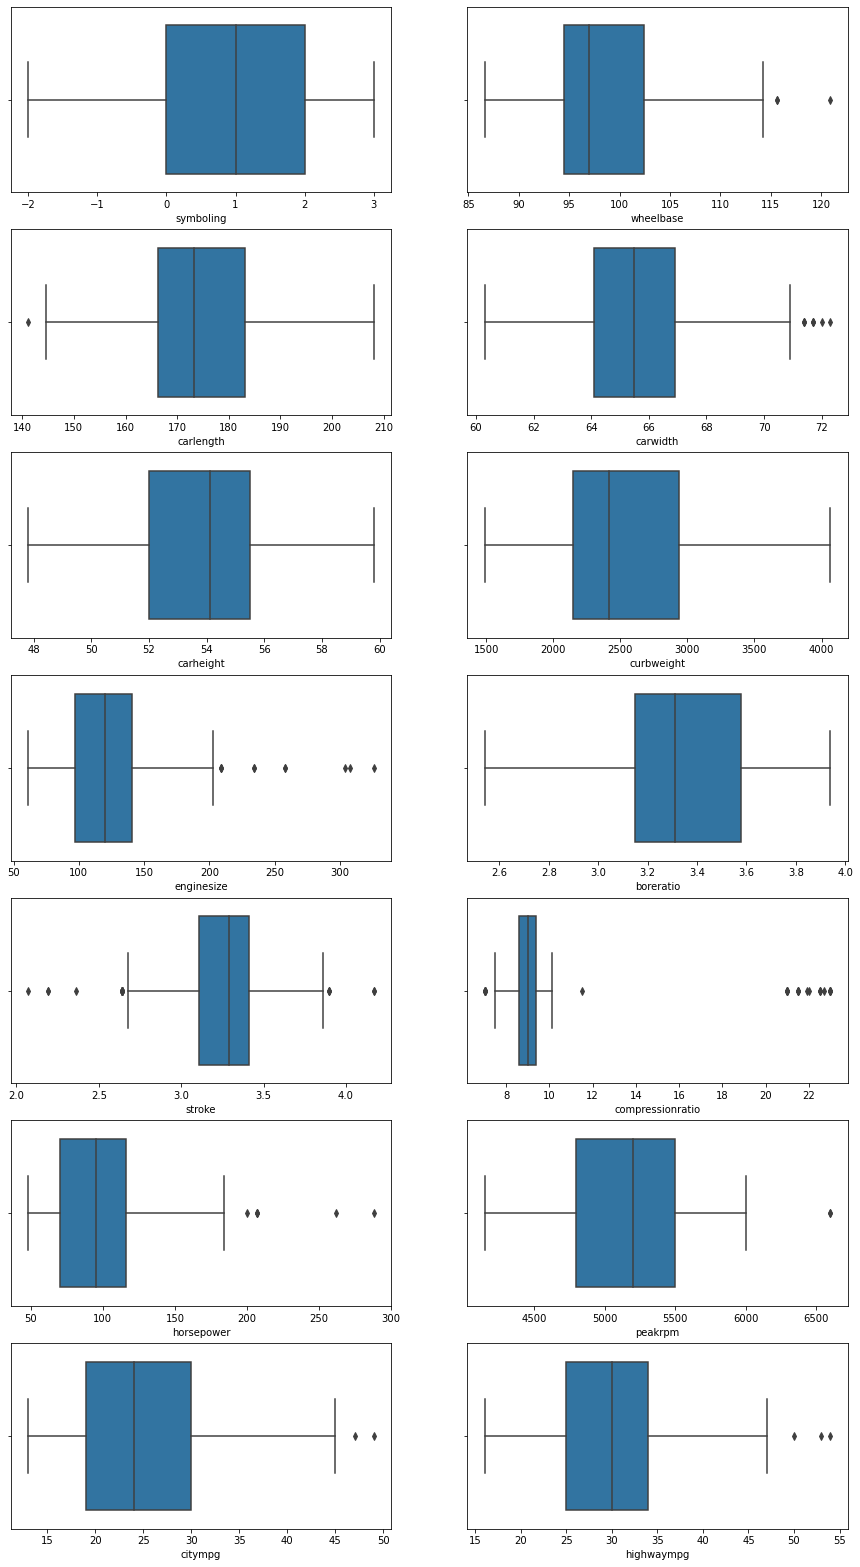

In [41]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 28))

for ax, col in list(zip(axes.flat, num_cols)):   
    if col != 'price':    
        sns.boxplot(col, data=ap, ax=ax)

few outliers in the columns

<AxesSubplot:>

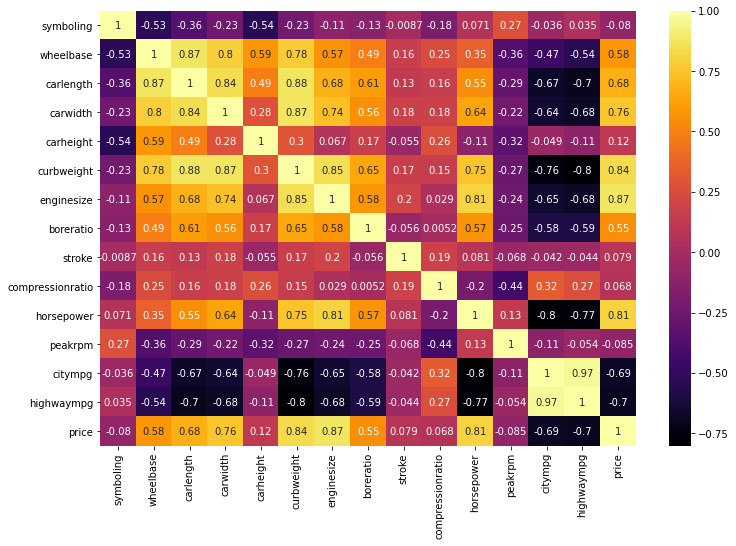

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(data=ap.corr(),annot=True,cmap='inferno')

in this we can see price column has:
- **high positive linear relationship** with "curb weight","enginesize","horsepower" 
- **high negative linear relationship** with "citympg" and "highwaympg"

## Bivariate analysis

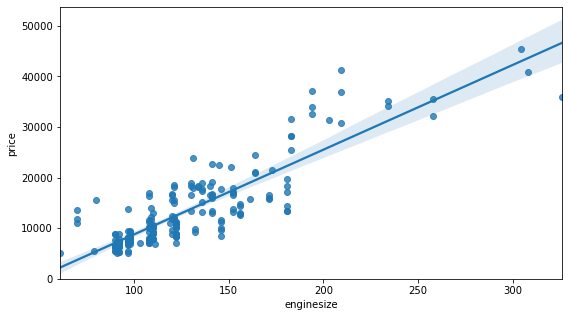

In [48]:
#plotting linear regression between price and enginesize
plt.figure(figsize=(9,5))
sns.regplot(x="enginesize", y="price", data=ap)
plt.ylim(0,);

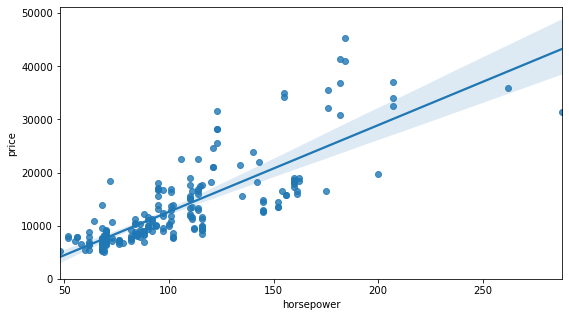

In [49]:
#plotting linear regression between price and horsepower
plt.figure(figsize=(9,5))
sns.regplot(x="horsepower", y="price", data=ap)
plt.ylim(0,);

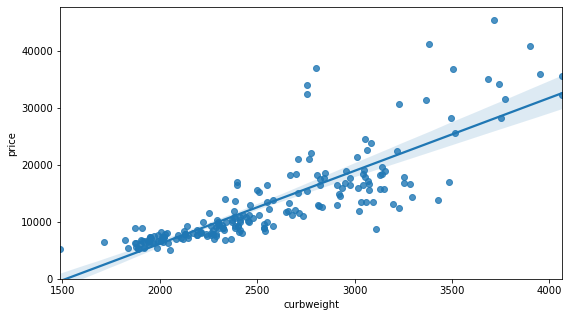

In [50]:
#plotting linear regression between price and curbweight
plt.figure(figsize=(9,5))
sns.regplot(x="curbweight", y="price", data=ap)
plt.ylim(0,);

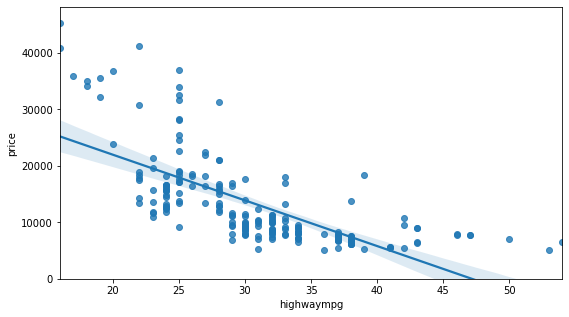

In [51]:
#plotting linear regression between price and highwaympg
plt.figure(figsize=(9,5))
sns.regplot(x="highwaympg", y="price", data=ap)
plt.ylim(0,);

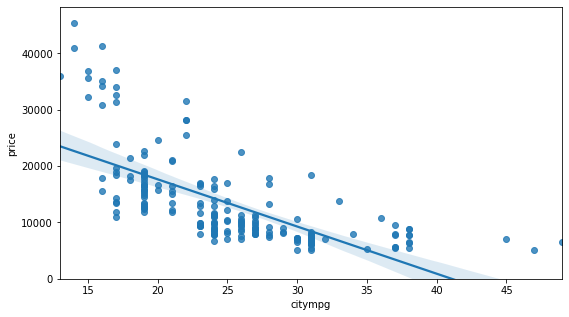

In [52]:
#plotting linear regression between price and highwaympg
plt.figure(figsize=(9,5))
sns.regplot(x="citympg", y="price", data=ap)
plt.ylim(0,);

- we can see as **"enginesize","horsepower",'curbweight'** increases price also increases
- as **"citympg"** and **"highwaympg"** increases price  decreases.


**enginesize** and **highwaympg** can be the high potential predictive variable for price

but let's try regression plot  for all numerical columns

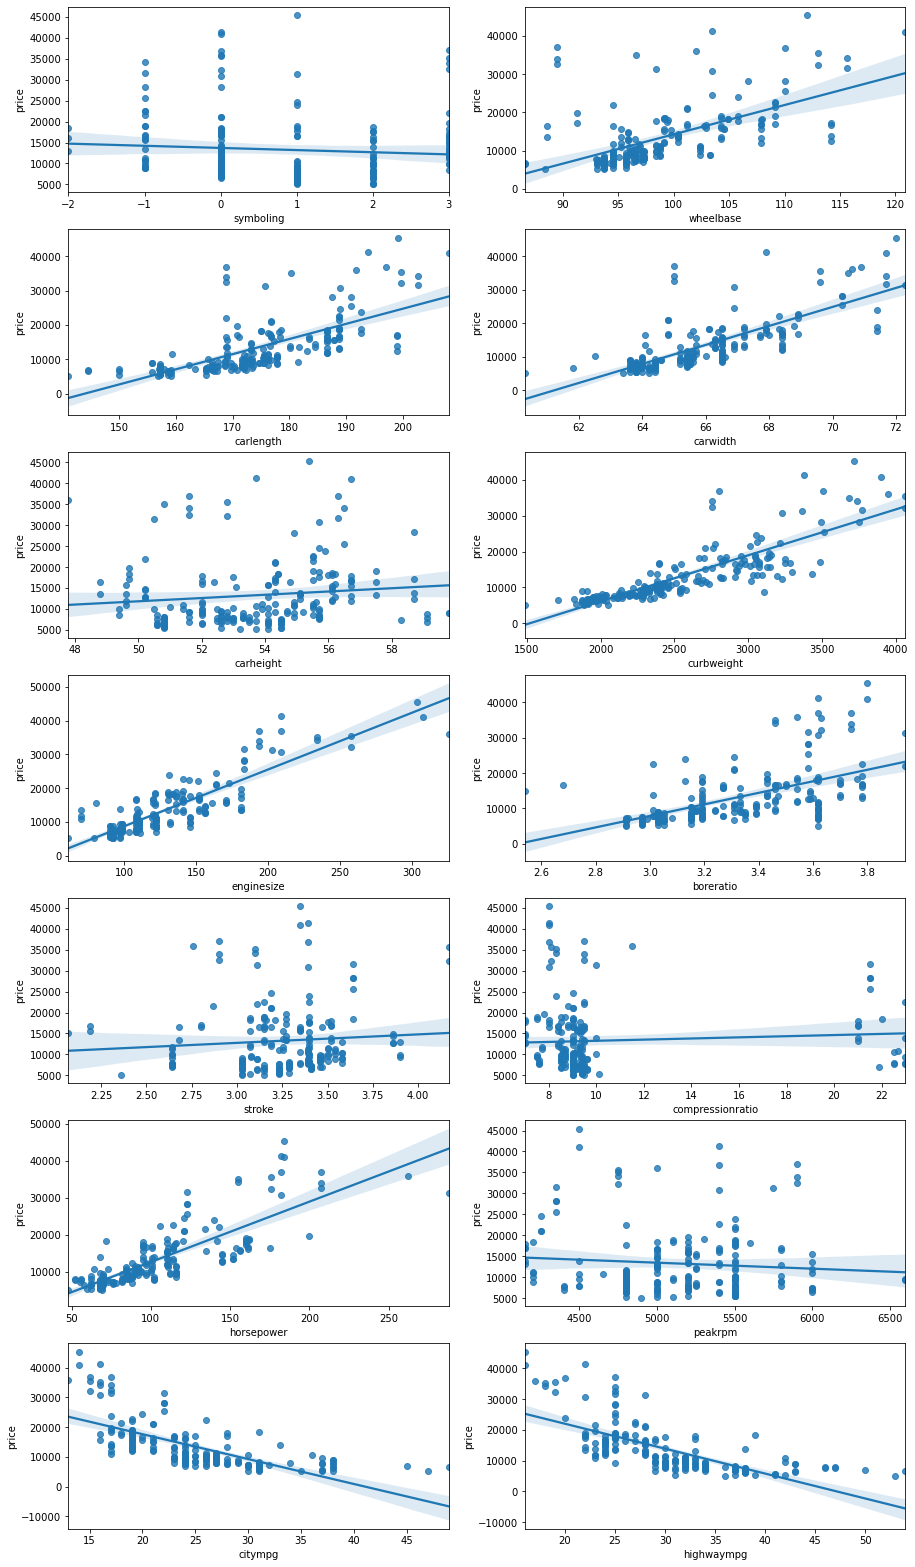

In [53]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 28))

for ax, col in list(zip(axes.flat, num_cols)):      
    sns.regplot(col, 'price', data=ap, ax=ax)

columns whose regression line close to horizontal havong weak relatinship

now lets plot box plot for all categorical variables

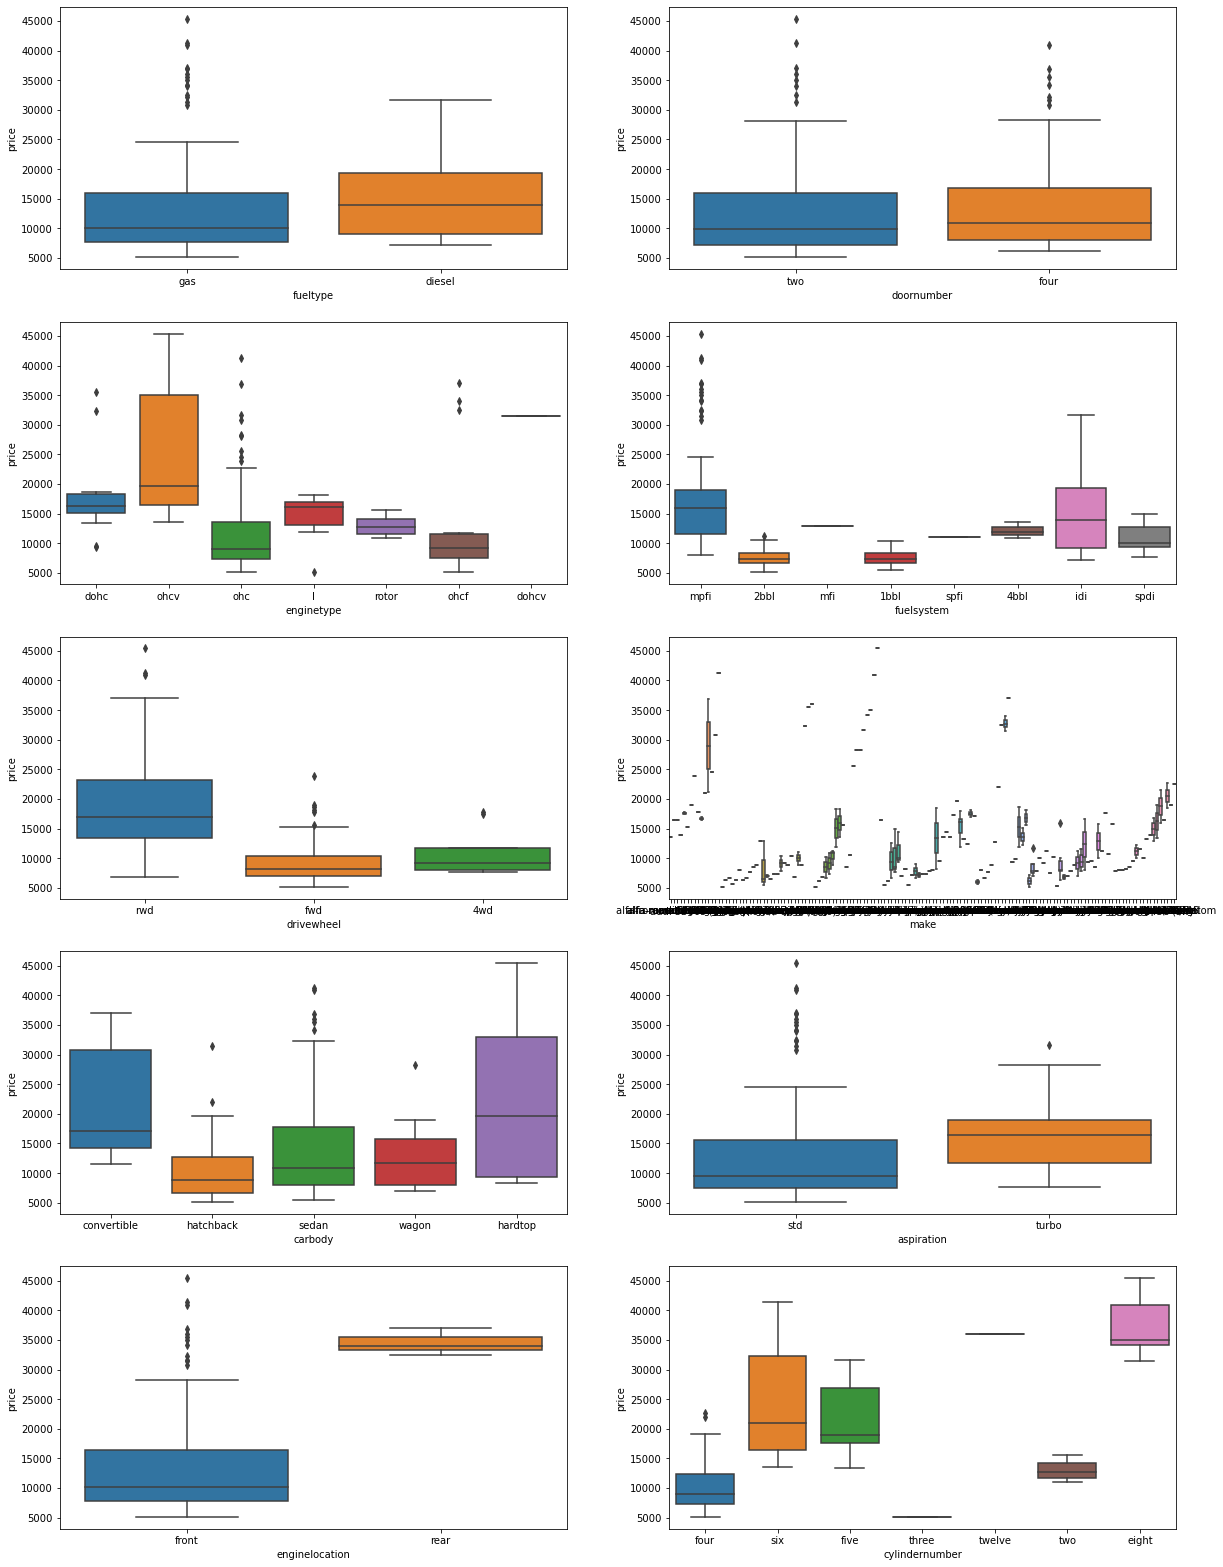

In [56]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.boxplot(x=col , y="price", data=ap, ax=ax)

Important Categorical Features:
- enginelocation, carbody, fueltype,cilindernumber, drivewheel

### Data Cleaning

In [58]:
ap_cleaned = ap.copy(deep=True)

In [59]:
ap_cleaned.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [60]:
ap_cleaned.drop(['make'], axis=1,inplace=True)
ap_cleaned.drop(ap_cleaned[ap_cleaned['compressionratio']>12].index,inplace=True)
ap_cleaned.drop(ap_cleaned[ap_cleaned['peakrpm']>6000].index, inplace=True)
ap_cleaned.drop(ap_cleaned[ap_cleaned['citympg']>45].index, inplace=True)
ap_cleaned.drop(ap_cleaned[ap_cleaned['highwaympg']>45].index, inplace=True)

In [62]:
ap_cleaned.shape

(180, 24)

### important Features are 
 **'enginelocation', 'carbody', 'fueltype','cylindernumber', 'drivewheel''wheelbase',** 

**'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg**

taking Predictive varibale as engine size for price

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=ap[['enginesize']]
y=ap['price']

### Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [74]:
pred= lm.predict(X_test)

In [78]:
r2_score(y_test,pred)

0.7797940080893314

by using engine size we get r2 score as 0.77 which is good 

## -Make a multiple regression model

In [92]:
# These Are the final Features
categorical_cols_new = ['enginelocation', 'carbody', 'fueltype','cylindernumber', 'drivewheel']
numerical_cols_new = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
              'boreratio', 'horsepower', 'citympg', 'highwaympg']

In [94]:
ap_final = ap_cleaned[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
              'boreratio', 'horsepower', 'citympg', 'highwaympg','enginelocation',
              'carbody', 'fueltype','cylindernumber', 'drivewheel','price']]
ap_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,enginelocation,carbody,fueltype,cylindernumber,drivewheel,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,front,hatchback,gas,six,rwd,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,front,sedan,gas,four,fwd,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,front,sedan,gas,five,4wd,17450.0


In [96]:
ap_final = pd.get_dummies(ap_final, drop_first=True)
ap_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,0,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,0,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,0,1,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,0,0,1,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,0


In [97]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
ap_final[numerical_cols_new] = sc.fit_transform(ap_final[numerical_cols_new])

In [99]:
ap_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,0.058309,0.381102,0.219048,0.324433,0.234375,0.664286,0.223684,0.32,0.407407,13495.0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.058309,0.381102,0.219048,0.324433,0.234375,0.664286,0.223684,0.32,0.407407,16500.0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.230321,0.418898,0.352381,0.446818,0.320312,0.100000,0.412281,0.24,0.370370,16500.0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.384840,0.503937,0.419048,0.230530,0.152344,0.464286,0.184211,0.44,0.518519,13950.0,0,0,0,1,0,0,1,0,0,0,1,0
4,0.373178,0.503937,0.438095,0.447263,0.257812,0.464286,0.241228,0.20,0.222222,17450.0,0,0,0,1,0,1,0,0,0,0,0,0


In [100]:
X=ap_final.drop('price',axis=1)
y=ap_final['price']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [102]:
X_train.shape, X_test.shape

((126, 21), (54, 21))

In [103]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [104]:
reg.fit(X_train,y_train)

LinearRegression()

In [105]:
preds = reg.predict(X_test)

In [106]:
reg.score(X_test,y_test)

0.8269069107381626

In [107]:
r2_score(y_test,preds)

0.8269069107381626

By using all the selected feature we have R2 value of 0.82 which is really good.